In [1]:
# Import necessary libraries
from fnal import Dataset
from infn import INFNDataset
from utilities import plot_planes, plot_crate, plot_tpc, plot_wire_planes, plot_waveform, plot_ffts
from toy_waveform_generator import generate_waveform, generate_component

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/Projects/channel_map/'
data = [Dataset(input_path, 10097), Dataset(input_path, '0001', mc=True)]
labels = ['Run 10097', 'Monte Carlo']

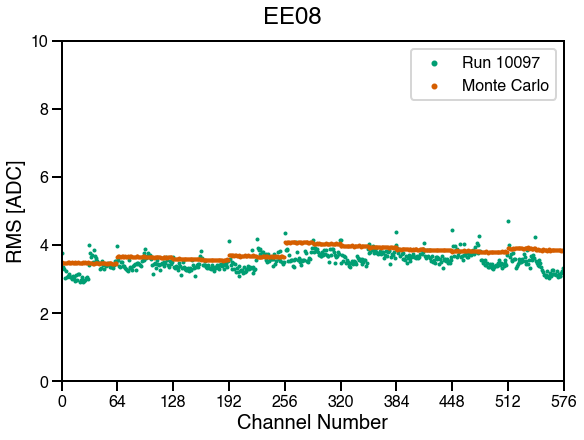

In [3]:
# Test plotting of mini-crate noise metrics.
plot_crate(data, labels, 'raw_rms', 'EE08')

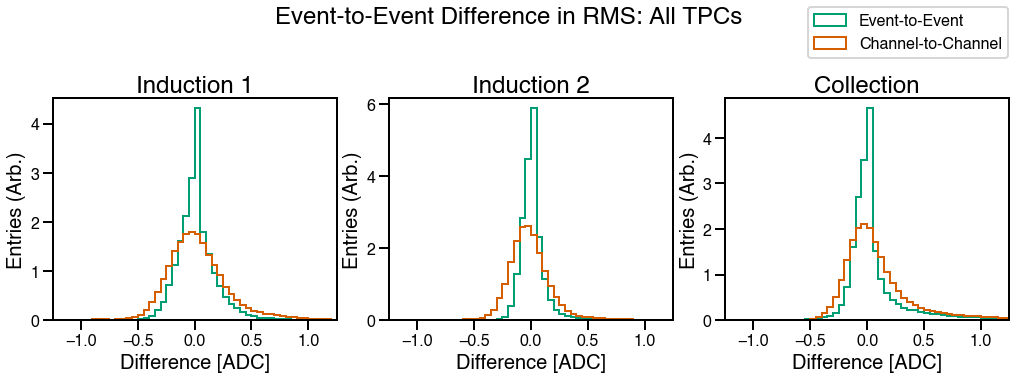

In [4]:
# Test plotting of RMS differences
plot_planes(data[0], 'int_rms', ['e2eabs', 'c2cabs'])

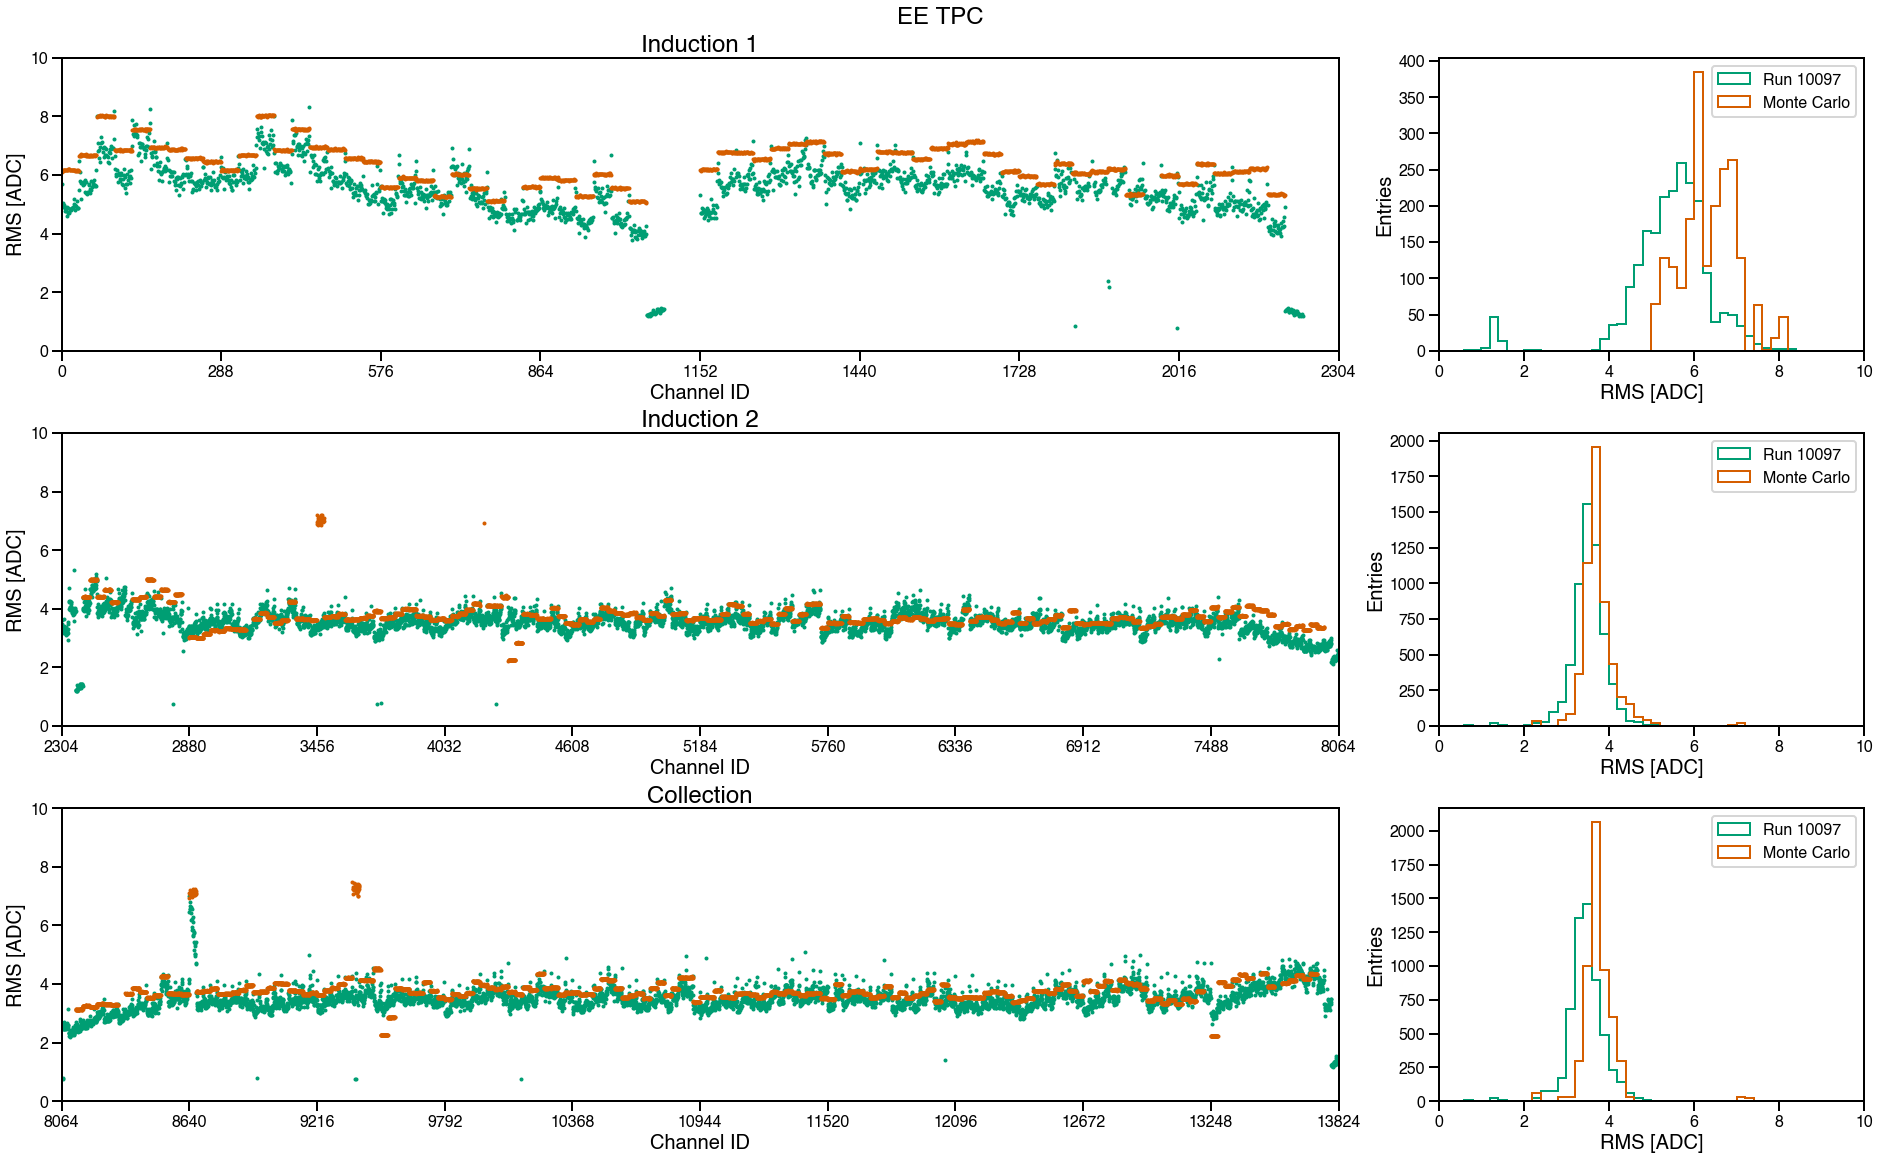

In [5]:
# Test plotting of the TPC noise metrics.
plot_tpc(data, labels, 'raw_rms', 0)

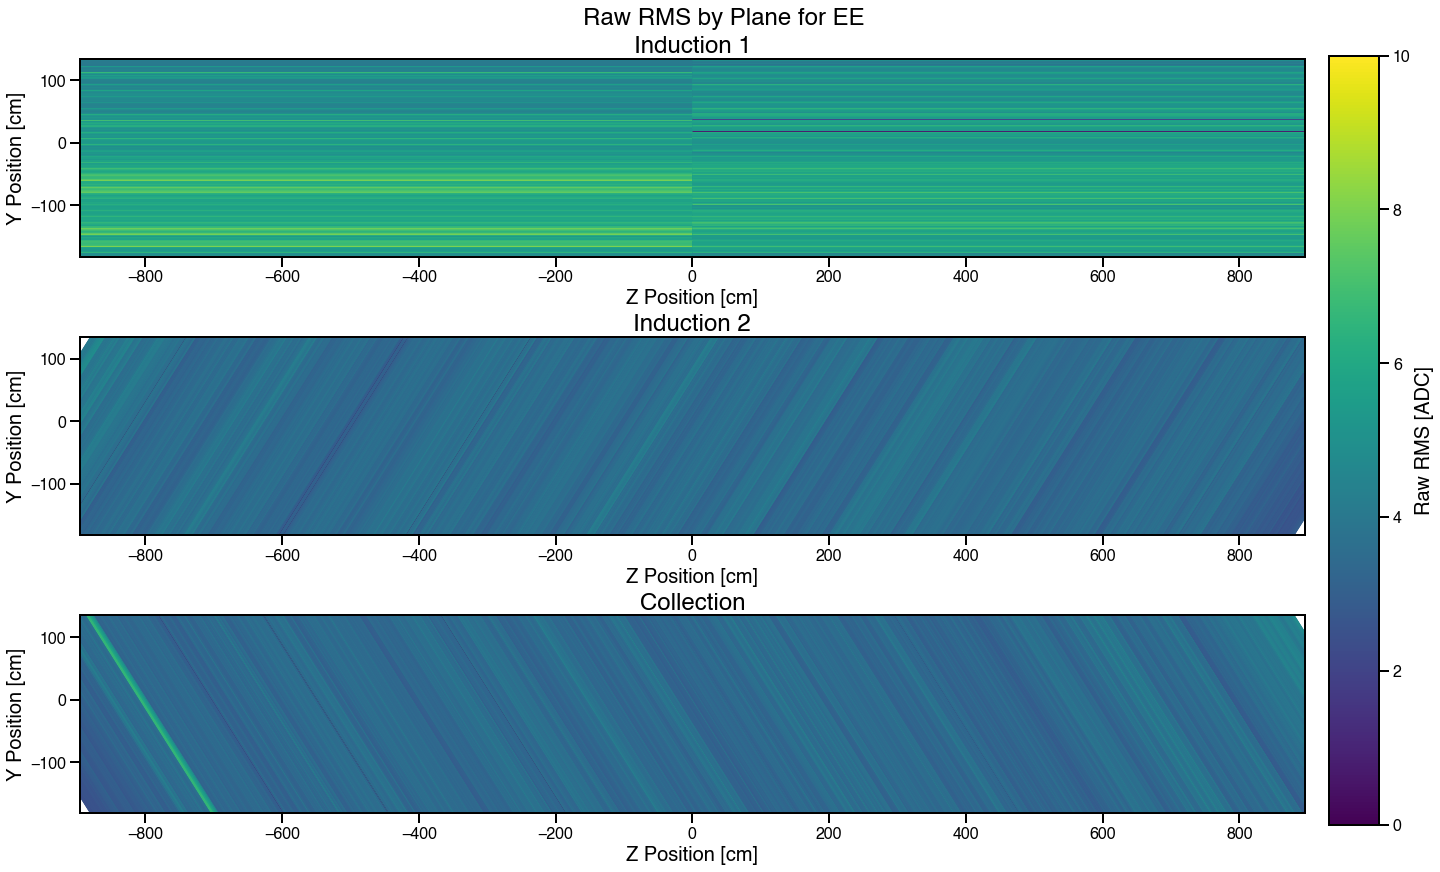

In [6]:
# Test plotting of the full TPC using a "plane-view"
plot_wire_planes(data[0], 'raw_rms', 'Raw RMS [ADC]', 0)

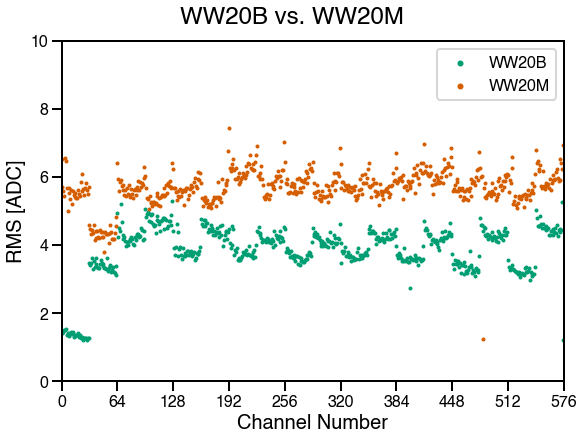

In [7]:
# Test plotting different components against each other.
data = [data[0], data[0]]
labels = ['WW20B', 'WW20M']
plot_crate(data, labels, 'raw_rms', ['WW20B', 'WW20M'])

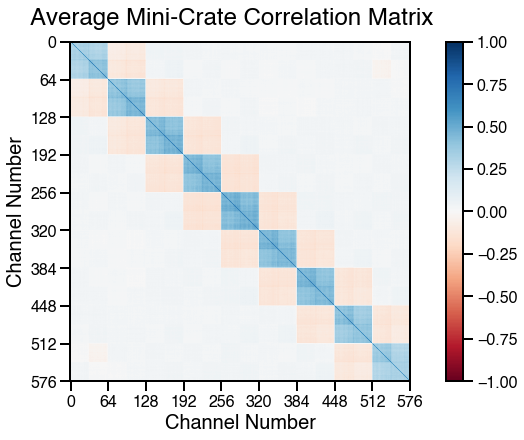

In [8]:
# Test correlation matrix for FNAL data.
data[0].plot_correlation_matrix('all')

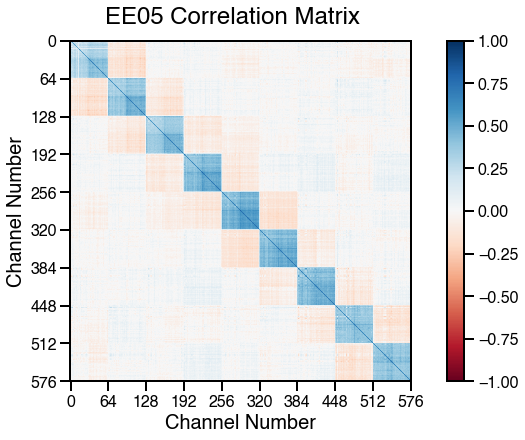

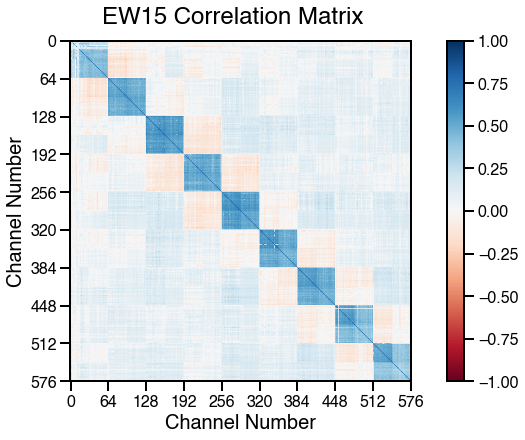

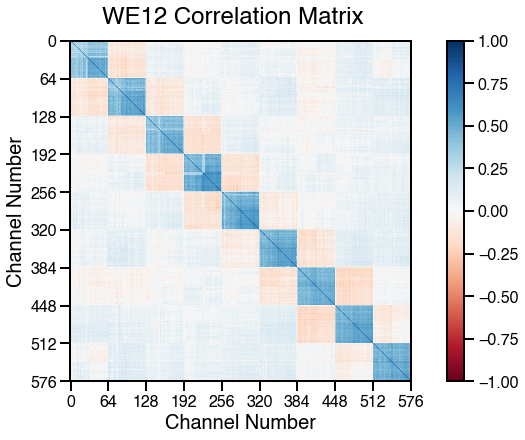

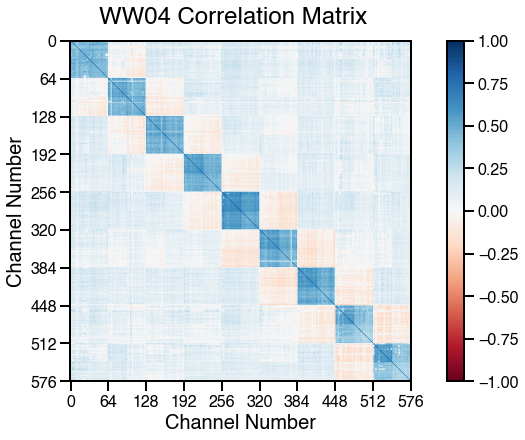

In [9]:
data[0].plot_correlation_matrix('EE05')
data[0].plot_correlation_matrix('EW15')
data[0].plot_correlation_matrix('WE12')
data[0].plot_correlation_matrix('WW04')

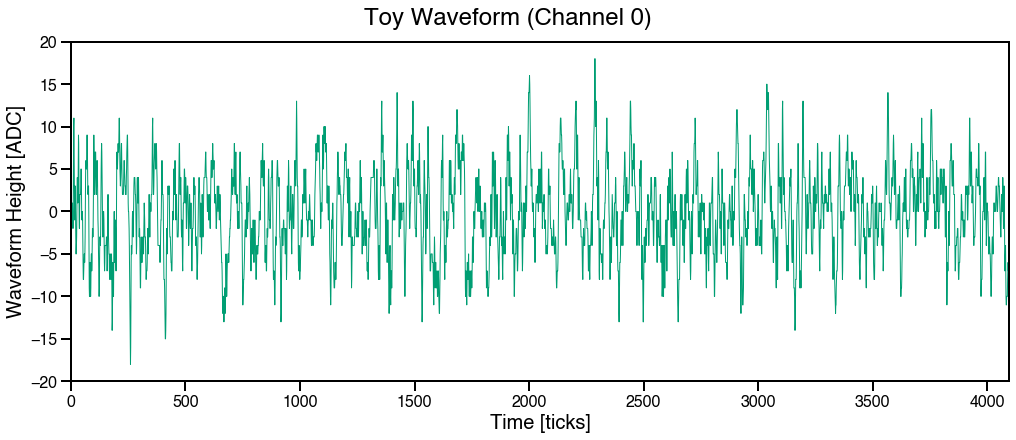

In [10]:
# Test toy waveform generation.
waveform = generate_waveform(data[0], 0)
plot_waveform(waveform, 'Toy Waveform (Channel 0)')

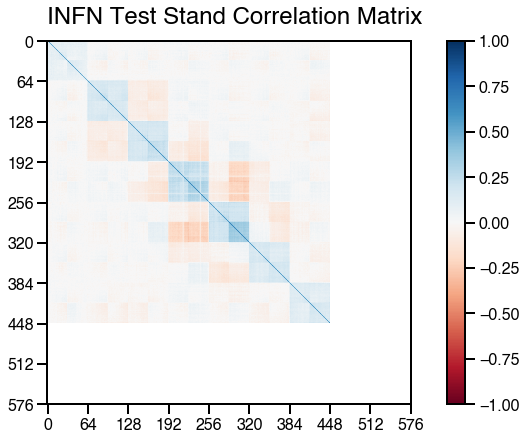

In [11]:
# Test INFN data parsing and noise analysis.
data_infn = INFNDataset('/Volumes/MUSB/infn_data/RUN_100264', 5)
data_infn.plot_correlation_matrix()

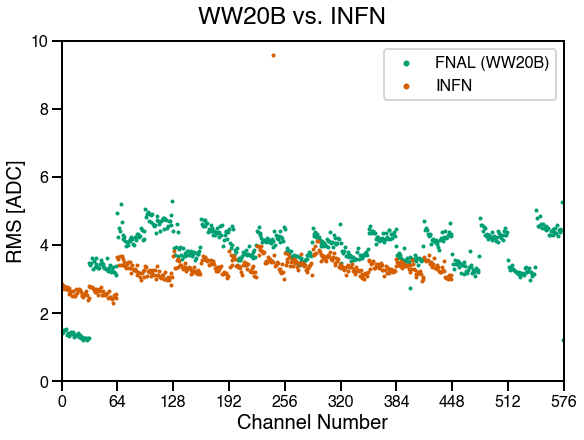

In [12]:
# Test comparison of INFN and FNAL data.
labels = 'FNAL (WW20B)', 'INFN'
plot_crate([data[0], data_infn], labels, 'raw_rms', ['WW20B', 'INFN'])